In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
results_path = "/home/user/Documents/workspace/bigdataneurolab/thesis/optimization_project/dask_io_experiments/tmp_dir/premiers_resultats_exp4.csv"
cols = ["hardware", "chunk shape", "split time(s)", "merge time(s)"]
csv_data = pd.read_csv(results_path, header=None, names=cols)

In [3]:
csv_data.head()

,hardware,chunk shape,split time(s),merge time(s)
0,SSD,"(5, 1512, 1750)",427.951299,60.880021
1,SSD,"(275, 189, 250)",450.295047,97.747062
2,HDD,"(275, 189, 250)",472.511486,200.961255
3,HDD,"(5, 1512, 1750)",433.496789,67.865908


In [4]:
hdd_data = csv_data[csv_data["hardware"]=="HDD"].drop(columns=["hardware"])
ssd_data = csv_data[csv_data["hardware"]=="SSD"].drop(columns=["hardware"])

In [5]:
hdd_data_mean = hdd_data.groupby(["chunk shape"]).mean()
hdd_data_std = hdd_data.groupby(["chunk shape"]).std()
ssd_data_mean = ssd_data.groupby(["chunk shape"]).mean()
ssd_data_std = ssd_data.groupby(["chunk shape"]).std()

In [6]:
# csv_data = csv_data.replace("(5, 1512, 1750)", "good").replace("(275, 189, 250)", "bad")
# csv_data_mean = csv_data_mean.sort_values(by="chunk shape")
# csv_data_mean

Text(0.5, 0.98, 'Results of experiment 1 comparing dask behavior when splitting/merging 3D arrays')

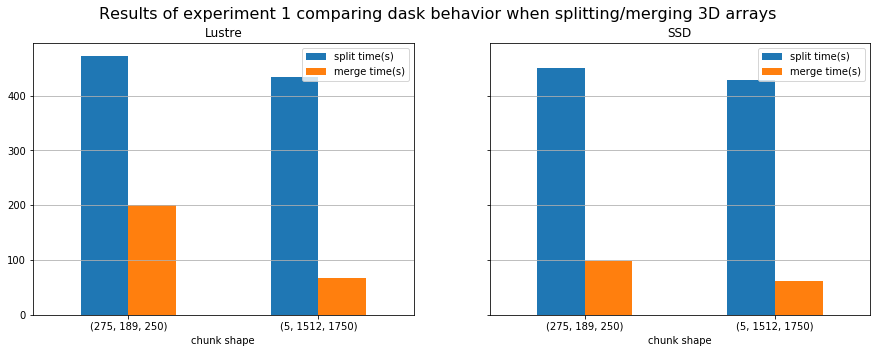

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)
hdd_data_mean.plot(kind="bar", ax=axes[0], yerr=hdd_data_std, rot=0, title="Lustre")
ssd_data_mean.plot(kind="bar", ax=axes[1], yerr=ssd_data_std, rot=0, title="SSD")
axes[0].grid(axis="y")
axes[1].grid(axis="y")
fig.suptitle('Results of experiment 1 comparing dask behavior when splitting/merging 3D arrays', fontsize=16)

In [8]:
imgfilepath = "/home/user/Documents/workspace/bigdataneurolab/thesis/optimization_project/dask_io_experiments/tmp_dir/second.png"
fig.savefig(imgfilepath)